In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Import experimental data
gcamp_muts = pd.read_csv('./GCaMP6_lib.csv', index_col = 0)[1:]

# Get sequence for alignments
gcamp3_seq = 'MGSHHHHHHGMASMTGGQQMGRDLYDDDDKDLATMVDSSRRKWNKTGHAVRAIGRLSSLENVYIKADKQKNGIKANFKIRHNIEDGGVQLAYHYQQNTPIGDGPVLLPDNHYLSVQSKLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYIQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNTRDQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGDGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK*'
# Numbering here is correct, so index = seq_number - 1

AA1idx = [
    'A',
    'V',
    'L',
    'I',
    'M',
    'F',
    'Y',
    'W',
    'S',
    'T',
    'N',
    'Q',
    'C',
    'D',
    'E',
    'H',
    'K',
    'R',
    'G',
    'P',
    '*'
]

AA3idx = [
    'Ala',
    'Val',
    'Leu',
    'Ile',
    'Met',
    'Phe',
    'Tyr',
    'Trp',
    'Ser',
    'Thr',
    'Asn',
    'Gln',
    'Cys',
    'Asp',
    'Glu',
    'His',
    'Lys',
    'Arg',
    'Gly',
    'Pro',
    'Stop'
]

# DF with Z-scores (only mutated positions)
varArrDF = pd.read_csv('./varZScore3.csv', index_col = 0)
colsToDrop = varArrDF.nunique()[varArrDF.nunique() == 1].index
dat = varArrDF.drop(colsToDrop, axis = 1)



In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
x = dat
y = gcamp_muts['160 AP !F/F0']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scaling
"""scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)"""

'scaler = sklearn.preprocessing.StandardScaler()\nscaler.fit(x_train)\nx_train = scaler.transform(x_train)\nx_test = scaler.transform(x_test)'

/Users/nguyenva/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


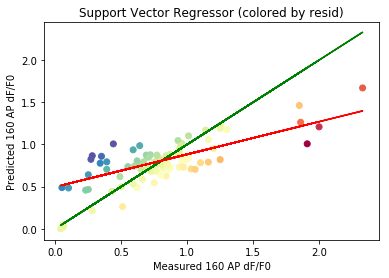

In [14]:
# SVR with scaled values?
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
resid = y_pred - y_test

plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'g')

b, m = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, b + m * y_test, 'r')


plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Support Vector Regressor (colored by resid)')
plt.show()

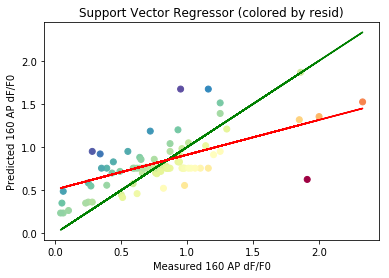

In [15]:
# Gradient boosting?
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor()
gradboost.fit(x_train, y_train)
y_pred = gradboost.predict(x_test)
resid = y_pred - y_test

plt.scatter(y_test, y_pred, c = resid, cmap = 'Spectral')
plt.plot(y_test, y_test, 'g')

b, m = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, b + m * y_test, 'r')


plt.xlabel('Measured 160 AP dF/F0')
plt.ylabel('Predicted 160 AP dF/F0')
plt.title('Gradient Boosting Regressor (colored by resid)')
plt.show()

In [19]:
# Cross validation of gradient boosting, random forest, and SVR
# Choose different CV method (ridge regressor, SVR, random forest)
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits = 100, test_size = 0.2)
ss.get_n_splits(x)


ridgeScores = []
svrScores = []
rfScores = []
adaScores = []
gradScores = []

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = Ridge()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    ridgeScores.append(mdl.score(x_test, y_test))
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.svm.SVR()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    svrScores.append(mdl.score(x_test, y_test))
    
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = RandomForestRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    rfScores.append(mdl.score(x_test, y_test))

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.ensemble.AdaBoostRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    adaScores.append(mdl.score(x_test, y_test))
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = GradientBoostingRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    gradScores.append(mdl.score(x_test, y_test))

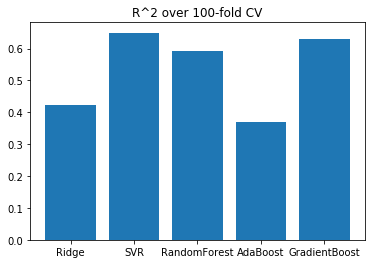

In [20]:
plt.bar([1, 2, 3, 4, 5],[np.mean(ridgeScores), np.mean(svrScores), np.mean(rfScores), np.mean(adaScores), np.mean(gradScores)])
plt.xticks([1, 2, 3, 4, 5], ['Ridge', 'SVR', 'RandomForest', 'AdaBoost', 'GradientBoost'])
plt.title('R^2 over 100-fold CV')
plt.show()

In [30]:
gcamp_muts.iloc[:5, [0, 1, 2, 4, 6, 10]]

,Number of wells,Mutations added to GCaMP3,1 AP !F/F0,3 AP !F/F0,10 AP !F/F0,160 AP !F/F0
GCaMP3,322,base,1.00,1.00,1.00,1.00
GCaMP5G,55,T302L R303P D380Y,1.91,1.89,1.68,1.76
GCaMP6s,12,K78H T302L R303P D380Y T381R S383T R392G,15.39,16.19,8.88,2.99
GCaMP6m,17,T302L R303P M378G K379S D380Y T381R S383T R392G,13.27,9.52,5.49,2.09
GCaMP6f,16,T302L R303P A317E D380Y T381R S383T R392G,8.71,9.42,5.35,2.33


In [31]:
gcamp_muts

,Number of wells,Mutations added to GCaMP3,1 AP !F/F0,2 AP !F/F0,3 AP !F/F0,5 AP !F/F0,10 AP !F/F0,20 AP !F/F0,40 AP !F/F0,80 AP !F/F0,...,2 AP p-value,3 AP p-value,5 AP p-value,10 AP p-value,20 AP p-value,40 AP p-value,80 AP p-value,160 AP p-value,Decay half time (10 AP) p-value,F0 normalized to mCherry fluorescence p-value
GCaMP3,322,base,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
GCaMP5G,55,T302L R303P D380Y,1.91,2.05,1.89,1.70,1.68,1.62,1.65,1.74,...,9.060000e-12,7.260000e-11,1.100000e-10,2.760000e-14,2.900000e-17,5.410000e-22,1.330000e-25,3.530000e-28,9.770000e-01,5.120000e-08
GCaMP6s,12,K78H T302L R303P D380Y T381R S383T R392G,15.39,20.75,16.19,11.81,8.88,5.99,5.14,3.79,...,1.790000e-08,1.970000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,3.950000e-06,4.150000e-03
GCaMP6m,17,T302L R303P M378G K379S D380Y T381R S383T R392G,13.27,12.20,9.52,7.41,5.49,4.36,3.52,2.59,...,1.730000e-09,1.980000e-09,1.150000e-09,1.110000e-09,1.040000e-09,1.040000e-09,1.040000e-09,1.040000e-09,1.730000e-09,4.110000e-05
GCaMP6f,16,T302L R303P A317E D380Y T381R S383T R392G,8.71,12.70,9.42,6.44,5.35,3.97,3.09,2.63,...,2.310000e-08,2.450000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.820000e-08,5.660000e-03,1.750000e-04
3,12,D380Y,1.89,1.89,1.91,1.92,1.89,1.75,1.63,1.47,...,4.030000e-03,1.770000e-03,4.580000e-04,2.170000e-05,1.070000e-05,4.410000e-06,6.910000e-06,8.550000e-03,6.350000e-01,3.500000e-01
29,17,T302L R303P D380Y,2.51,3.12,2.78,2.57,2.39,2.05,1.79,1.81,...,2.540000e-05,1.060000e-05,2.000000e-06,1.450000e-07,2.310000e-09,8.350000e-11,1.990000e-10,1.180000e-08,2.720000e-01,2.880000e-05
30,8,T302L R303P,5.06,2.85,3.21,1.59,1.32,1.10,1.05,0.93,...,8.700000e-02,1.450000e-01,2.280000e-01,1.700000e-01,2.610000e-01,5.530000e-01,7.070000e-01,8.480000e-01,2.430000e-01,1.180000e-04
31,12,L59H E60P T302L R303P,2.68,2.79,2.33,2.05,1.87,1.75,1.92,2.08,...,1.660000e-05,2.010000e-05,4.120000e-05,5.870000e-06,1.790000e-07,2.250000e-08,5.650000e-09,5.230000e-09,1.450000e-06,7.420000e-06
54,5,V168N,0.85,0.83,0.81,0.71,0.94,0.98,1.01,1.07,...,1.490000e-01,9.810000e-02,4.060000e-02,2.510000e-01,4.880000e-01,8.520000e-01,2.020000e-01,2.620000e-01,2.880000e-02,2.470000e-01
